I've chosen to train a model on a collection of fraudulent credit card transactions to try to find what most consistently correlates with fraudulent tarnsactions. 
Let's start by importing the data and taking a look at it.

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('card_transdata.csv')

In [23]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Looks pretty good at a glance. The names are clear, and all the criteria looks potentially useful for training a model. Let's see what the types are next.

In [24]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

They're all floats, so no cleaning is required here as far as mixed data types or worrying about categorical variables. Let's check how many entries we have.

In [25]:
df.shape

(1000000, 8)

Exactly one million. One last cleanliness check to do; let's see if there are any null values.

In [26]:
df=df.dropna()

In [27]:
df.shape

(1000000, 8)

Not one. It's perfecly clean. 

Next, I'd like to see if there are any outliers in the data set. I'll run a series of scatter-plots and drop any outliers I see.

In [28]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='fraud', ylabel='distance_from_home'>

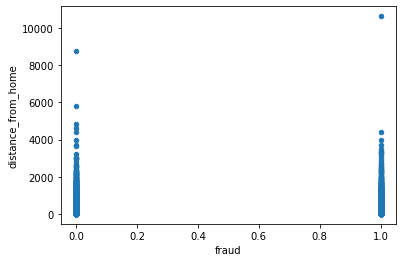

In [29]:
df.plot(x='fraud',y='distance_from_home',kind='scatter')

In [30]:
df=df[df['distance_from_home']<5000]

<AxesSubplot:xlabel='fraud', ylabel='distance_from_last_transaction'>

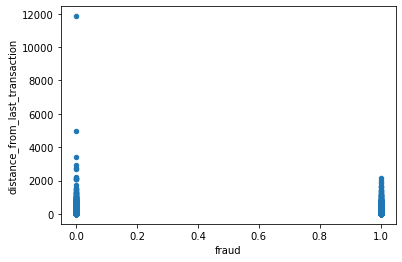

In [31]:
df.plot(x='fraud',y='distance_from_last_transaction',kind='scatter')

In [32]:
df=df[df['distance_from_last_transaction']<4000]

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

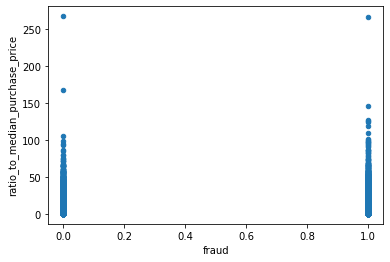

In [33]:
df.plot(x='fraud',y='ratio_to_median_purchase_price',kind='scatter')

In [34]:
df=df[df['ratio_to_median_purchase_price']<150]

<AxesSubplot:xlabel='fraud', ylabel='distance_from_home'>

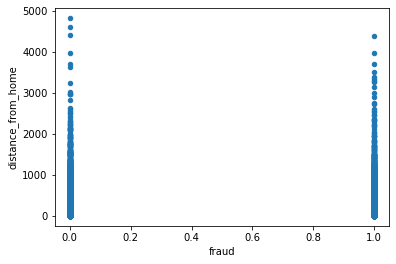

In [35]:
df.plot(x='fraud',y='distance_from_home',kind='scatter')

<AxesSubplot:xlabel='fraud', ylabel='distance_from_last_transaction'>

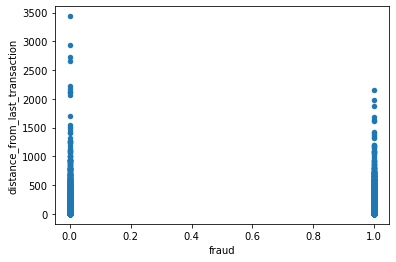

In [36]:
df.plot(x='fraud',y='distance_from_last_transaction',kind='scatter')

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

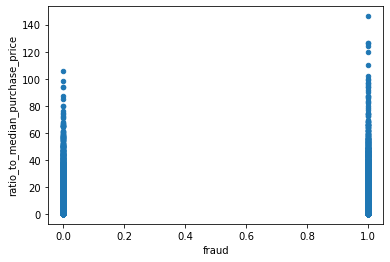

In [37]:
df.plot(x='fraud',y='ratio_to_median_purchase_price',kind='scatter')

In [38]:
df.shape

(999992, 8)

Just a few outliers. We're ready to proceed with modeling.

In [39]:
df.to_csv('cleaned_data.csv')